# 📧 SMS Spam Classifier Project

### **Goal**
The goal of this project is to build a Machine Learning model that can correctly classify SMS messages as either **Spam** (junk/malicious) or **Ham** (legitimate/normal).

### **Workflow**
1. **Data Loading:** Load the SMS Spam Collection dataset.
2. **Preprocessing:** Clean the text (remove punctuation, stopwords) and convert labels to numbers.
3. **Feature Extraction:** Convert text into numerical vectors (Bag of Words/TF-IDF) so the machine can understand it.
4. **Modeling:** Train a Naive Bayes classifier.
5. **Evaluation:** Check the accuracy and precision of the model.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

### **2. Loading the Dataset**
The dataset is a tab-separated file (TSV). We will load it and rename the columns to `label` (the target) and `text` (the message).

* **Label:** 'ham' or 'spam'
* **Text:** The content of the SMS

In [ ]:
df=pd.read_csv("SMSSpamCollection", sep="\t", names=['label', 'text'])

In [ ]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

### **3. Data Preprocessing (Cleaning)**
Computers cannot understand raw text. We need to clean the data to make it easier for the model to learn.

**Steps:**
1. **Label Encoding:** Convert `ham` to `0` and `spam` to `1`.
2. **Text Cleaning:** * Convert to lowercase.
   * Remove special characters and punctuation.
   * Remove "stopwords" (common words like "the", "is", "and" that add little meaning).

In [ ]:
for i in range (50):
    print(df.iloc[i,-1])
    print()

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Ok lar... Joking wif u oni...

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

U dun say so early hor... U c already then say...

Nah I don't think he goes to usf, he lives around here though

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

Even my brother is not like to speak with me. They treat me like aids patent.

As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.

Had your mobile 11 months or more? U

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

just downloading some nessesary reasources 

In [ ]:
# Download required NLTK resources (run this once) you dont need this cell if you run on google colab 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')  # Newer version of punkt tokenizer

# Verify the downloads worked
try:
    from nltk.tokenize import word_tokenize
    test_token = word_tokenize("Hello world")
    print("✓ NLTK tokenizer is working correctly!")
except LookupError as e:
    print(f"✗ Error: {e}")
    print("Please restart the kernel and run this cell again.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


✓ NLTK tokenizer is working correctly!


In [ ]:
sn=SnowballStemmer("english")
stop = set(stopwords.words('english'))

In [ ]:
def clean_text(sms):
   sms= sms.lower()
   sms= re.sub("[^a-z 0-9]", ' ', sms)  #if any charecter is not between a to z replace with sms 
   sms=word_tokenize(sms)
   sms= [t for t in sms if len(t)>1] #remove the charecters(words or numbers that consit of only one letter or number )
   sms= [sn.stem(word) for word in sms if word not in stop] #sn.stem is for playing to reduce it to play moreover the stop is the uneccesary words like is , are , at 
   sms= ' '.join(sms) #join it to a clean text
   return sms

In [ ]:
clean_text("Get is.. are.. playing  UNLIMITED <!!!!>,,,??? Free data play 100GB... at Rs.0")

'get play unlimit free data play 100gb rs'

In [ ]:
df['clean_text']=df['text'].apply(clean_text)

In [ ]:
df.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi great world l...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


Wordcloud

In [ ]:
#pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
hamdata=df[df['label']=='ham']
hamdata = hamdata['clean_text']

In [ ]:
hamdata

0       go jurong point crazi avail bugi great world l...
1                                     ok lar joke wif oni
3                           dun say earli hor alreadi say
4                    nah think goe usf live around though
6           even brother like speak treat like aid patent
                              ...                        
5565                                              huh lei
5568                                  go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: clean_text, Length: 4825, dtype: object

In [ ]:
def wordCloud(data):
    words=' '.join(data)
    wc=WordCloud(background_color='white')
    wc= wc.generate(words)

    plt.figure(figsize=(10,8))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
   

Ham data words : 


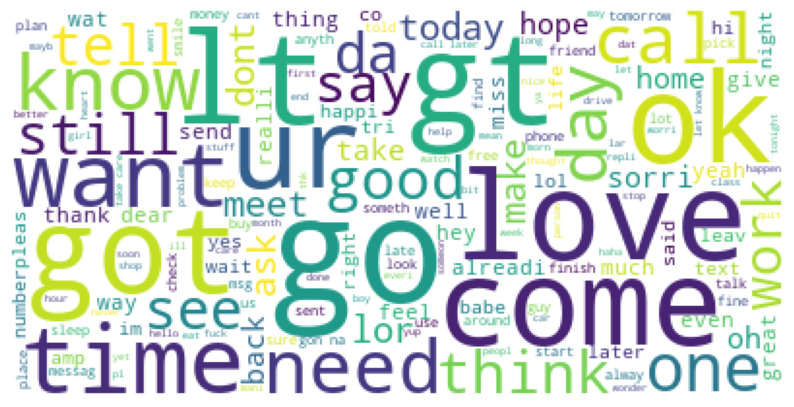

In [ ]:
print("Ham data words : ")
wordCloud(hamdata)

In [ ]:
spamdata=df[df['label']=='spam']
spamdata= spamdata['clean_text']

Spam Data words :


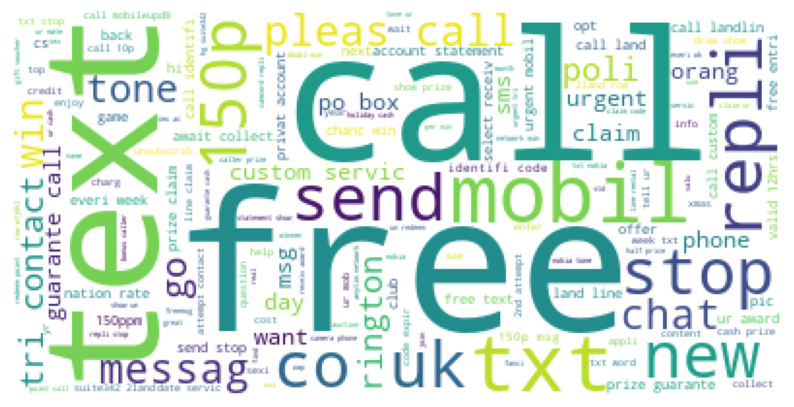

In [ ]:
print("Spam Data words :")
wordCloud(spamdata)

In [ ]:
df


,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi great world l...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tri contact 750 pound prize claim eas...
5568,ham,Will ü b going to esplanade fr home?,go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5570,ham,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


Featuraization

### **4. Model Training (Naive Bayes)**
We are using the **Multinomial Naive Bayes** algorithm. 

**Why Naive Bayes?**
It is one of the most effective algorithms for text classification because it works well with word counts and probabilities. It calculates the probability that a message is spam given the words it contains.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv= CountVectorizer()

In [ ]:
X= cv.fit_transform(df['clean_text']).toarray()

In [ ]:
X.shape

(5572, 7242)

In [ ]:
y=pd.get_dummies (df['label'])
y=y['spam'].values

In [ ]:
y

array([False, False,  True, ..., False, False, False], shape=(5572,))

Model Building 

### **5. Splitting the Data**
We split the dataset into two parts:
* **Training Set (80%):** Used to teach the model.
* **Testing Set (20%):** Used to evaluate how well the model performs on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB


In [ ]:
model= MultinomialNB()

### **6. Model Training (Naive Bayes)**
We are using the **Multinomial Naive Bayes** algorithm. 

**Why Naive Bayes?**
It is one of the most effective algorithms for text classification because it works well with word counts and probabilities. It calculates the probability that a message is spam given the words it contains.


**Why Naive Bayes?**
It is one of the most effective algorithms for text classification because it works well with word counts and probabilities. It calculates the probability that a message is spam given the words it contains.

In [ ]:
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_test, y_pred

(array([False,  True, False, ..., False,  True, False], shape=(1115,)),
 array([False,  True, False, ..., False,  True, False], shape=(1115,)))

In [ ]:
pd.DataFrame({'Actual': y_test, 'Predicted' :y_pred}).head(10)

,Actual,Predicted
0,False,False
1,True,True
2,False,False
3,False,False
4,False,False
5,False,False
6,True,True
7,False,False
8,False,False
9,False,False


Evaluation

### **7. Model Evaluation**
Now we test the model on the 20% of data it has never seen before.

**Key Metrics:**
* **Accuracy:** Overall correctness.
* **Precision:** Out of all messages predicted as Spam, how many were actually Spam? (Crucial to avoid blocking real messages).
* **Recall:** Out of all actual Spam messages, how many did we catch?
* **F1-Score:** A balance between Precision and Recall.

In [ ]:
print("Accuracy on training Data : ")
print(model.score(X_train, y_train))

Accuracy on training Data : 
0.9925959165357864


In [ ]:
print("Accuracy on Test Data: ")
print(model.score(X_test, y_test))##0.98 means 98% means it is not overfitting 

Accuracy on Test Data: 
0.9838565022421525


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[943,  12],
       [  6, 154]])

array([[943,  12],
       [  6, 154]]) this means out of 1115 there where 943+6 non spam and the model got 943 correct as non spam 
       and there where 154+12 spam and the model got 12 wrong as non spam and they where spamm 
       overall the model made 6+12=18 mistakes in array of 1115 emails

In [ ]:
y_test.shape

(1115,)

In [ ]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       955
        True       0.93      0.96      0.94       160

    accuracy                           0.98      1115
   macro avg       0.96      0.97      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
f1_score(y_test, y_pred)

0.9447852760736196

### **Conclusion**
The model successfully classifies SMS messages with high accuracy. 
* A high **Precision** score means legitimate messages are rarely blocked.
* A high **Recall** score means most spam messages are successfully caught.

The End